In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image


In [2]:
data_path = '/opt/ml/input/data'
train_img_dir = os.path.join(data_path, 'train/images')
test_img_dir = os.path.join(data_path, 'eval/images')
print(train_img_dir)
print(test_img_dir)

sample_submission = pd.read_csv(os.path.join(data_path, 'eval/info.csv'))
train_df = pd.read_csv(os.path.join(data_path,'train/train.csv'))
train_df_full_path = pd.read_csv('./data/train/train.csv')

/opt/ml/input/data/train/images
/opt/ml/input/data/eval/images


In [3]:
train_df = train_df.drop(['path'], axis=1)
train_df = train_df_full_path.merge(train_df, how = 'inner', on = 'id')

In [4]:
train_df.head()

,id,full_path,label,mask,gender,race,age
0,000001,/opt/ml/input/data/train/images/000001_female_...,4,wear,female,Asian,45
1,000001,/opt/ml/input/data/train/images/000001_female_...,4,wear,female,Asian,45
2,000001,/opt/ml/input/data/train/images/000001_female_...,4,wear,female,Asian,45
3,000001,/opt/ml/input/data/train/images/000001_female_...,4,wear,female,Asian,45
4,000001,/opt/ml/input/data/train/images/000001_female_...,16,not wear,female,Asian,45


In [5]:
train_df.to_csv('train_info.csv')

In [6]:
print(train_df['mask'].unique())
print(train_df['gender'].unique())
print(train_df['race'].unique())

['wear' 'not wear' 'incorrect']
['female' 'male']
['Asian']


In [7]:
clean = {'mask': {'not wear': 2, 'wear' : 0, 'incorrect': 1},
         'gender' : {'female': 1, 'male' : 0}}

train_df['mask_encode'] = train_df['mask'].apply(lambda x : clean['mask'][x])
train_df['gender_encode'] = train_df['gender'].apply(lambda x: clean['gender'][x])

def get_age_range(age):
    if age < 30:
        return "< 30"
    elif age >= 30 and age < 60:
        return ">= 30 and < 60"
    elif age >= 60:
        return ">= 60"

train_df['age_range'] = train_df['age'].apply(lambda x : get_age_range(x))

In [8]:
train_df.head()

,id,full_path,label,mask,gender,race,age,mask_encode,gender_encode,age_range
0,000001,/opt/ml/input/data/train/images/000001_female_...,4,wear,female,Asian,45,0,1,>= 30 and < 60
1,000001,/opt/ml/input/data/train/images/000001_female_...,4,wear,female,Asian,45,0,1,>= 30 and < 60
2,000001,/opt/ml/input/data/train/images/000001_female_...,4,wear,female,Asian,45,0,1,>= 30 and < 60
3,000001,/opt/ml/input/data/train/images/000001_female_...,4,wear,female,Asian,45,0,1,>= 30 and < 60
4,000001,/opt/ml/input/data/train/images/000001_female_...,16,not wear,female,Asian,45,2,1,>= 30 and < 60


In [9]:
sample_submission.head()

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,0
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,0
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,0
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,0
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,0


In [10]:
print("<data info>")
print(f"train data 개수: {len(train_df)}")
print("결측치 개수:")
print(pd.DataFrame(train_df.isnull().sum()))

<data info>
train data 개수: 18914
결측치 개수:
               0
id             0
full_path      0
label          0
mask           0
gender         0
race           0
age            0
mask_encode    0
gender_encode  0
age_range      0


In [11]:
example = '/opt/ml/input/data/train/images/000001_female_Asian_45'
files = [i for i in os.listdir(example) if '._' not in i]
print(len(files))

7


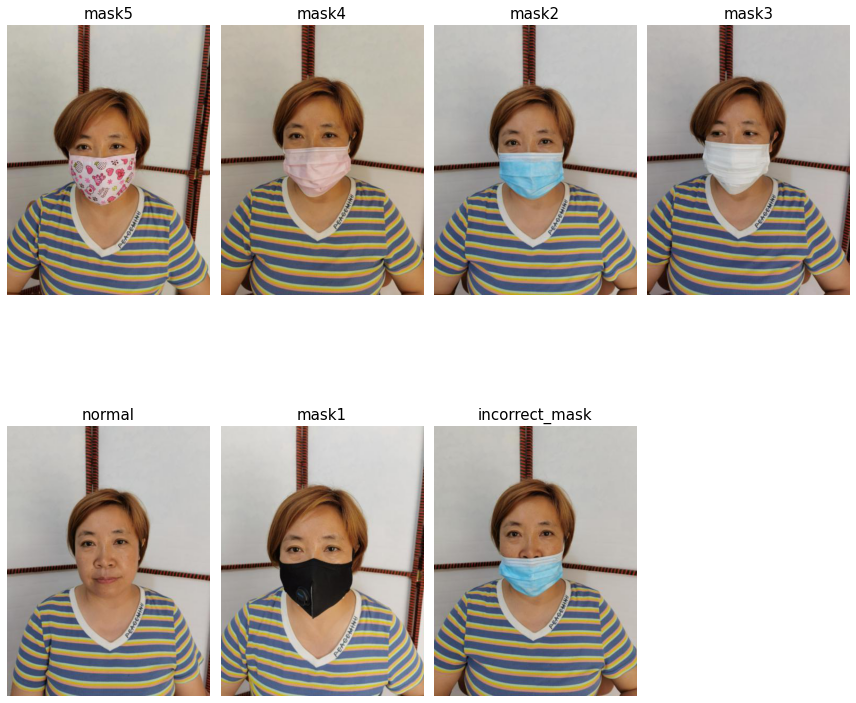

In [17]:
fig = plt.figure(figsize = (12,12))

for i, file in enumerate(files):
    img = Image.open(os.path.join(example, file))
    ax = fig.add_subplot(2, 4, i+1)
    ax.imshow(img)
    ax.set_title(file.split('.')[0], fontsize=15)
    ax.axis('off')
plt.tight_layout()
plt.show()


### EDA

#### 1. class imablance
    
    1) label count
    2) mask count
    3) gender count
    4) age count

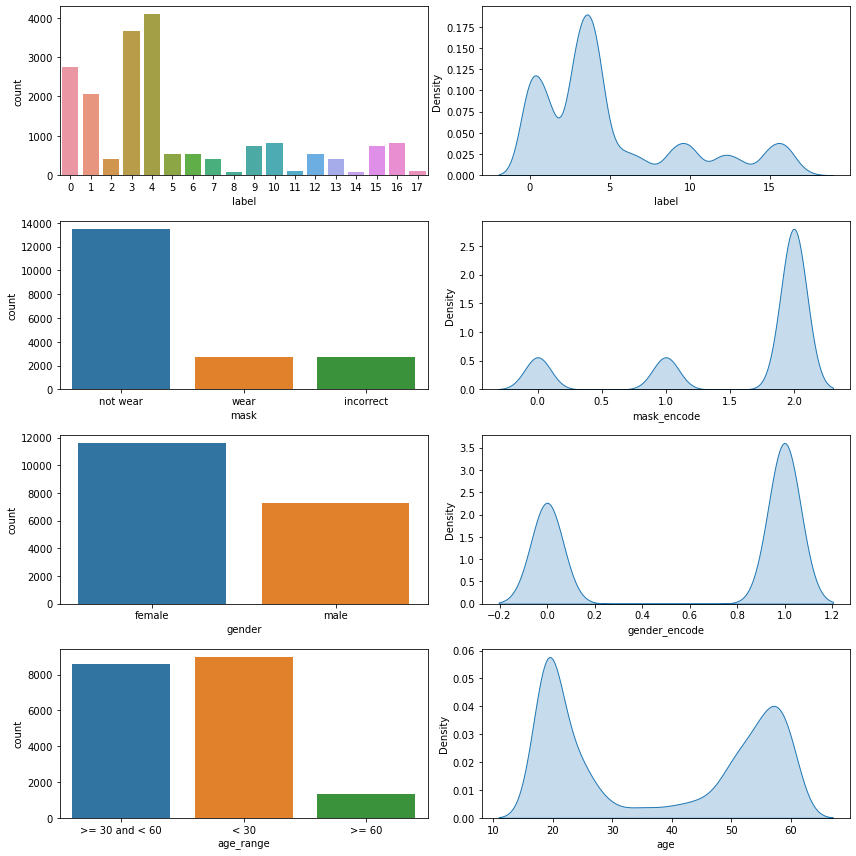

In [ ]:
fig, axes = plt.subplots(4, 2, figsize = (12, 12))
axes = axes.flatten()
sns.countplot(x = 'label', data=train_df, ax = axes[0])
sns.kdeplot(x = 'label', data=train_df, fill=True, ax=axes[1])
sns.countplot(x = 'mask', data=train_df, ax = axes[2])
sns.kdeplot(x = 'mask_encode', data=train_df, fill=True, ax=axes[3])
sns.countplot(x = 'gender', data=train_df, ax = axes[4])
sns.kdeplot(x = 'gender_encode', data=train_df, fill=True, ax=axes[5])
sns.countplot(x = 'age_range', data=train_df, ax = axes[6])
sns.kdeplot(x = 'age', data=train_df, fill=True, ax=axes[7])
plt.tight_layout()
plt.show()